# 24.07.10 머신러닝 실습 1회차: 선형회귀

## 01 개념

### 회귀분석

1. 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.

2. 회귀 분석의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 <최적의 회귀 계수>를 찾아내는 것이다.

### 선형 회귀

1. 실제 값과 예측 값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화 하는 방식이다.

2. 규제(Regularization)방법에 따라 다시 릿지 회귀, 라쏘 회귀, 엘라스틱넷 회귀로 나눌 수 있다.

3. 일반 선형 회귀란 예측 값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델이다.

### Residual Sum of Squares(RSS)

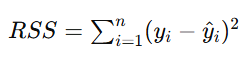

1. 잔차 제곱합(RSS)은 통계 및 회귀 분석에서 모델의 예측값과 실제 관측값 간의 차이를 측정하는 데 사용되는 중요한 개념이다.

2. RSS는 모델의 예측이 실제 데이터를 얼마나 잘 설명하는지를 평가하는 지표로 사용된다.

### 새로 배운 부분

1. 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. 라쏘 회귀는 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향적이 작은 피처의 회귀 계수를 0으로 만들어 예측 시 피처가 선택되지 않게 한다.

2. L2, L1 규제를 함께 결합한 모델이 엘라스틱넷(ElasticNet)회귀이다.

3. RSS는 회귀식의 독립변수와 종속변수가 중심 변수가 아니라 w변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다.

## 02 수식에 대한 이해

### 예를 들어, 주택 가격이 주택의 크기로만 결정된다고 가정해보자.

- 독립변수가 1개인 단순 선형 회귀식 y = w0 + w1*X

- 실제 주택 가격 = w0 + w1*X + 오류 값(Error)

- 여기서 오류 값을 잔차라고 부른다.

- 최적의 회귀모델을 만든다는 것은? 바로 전체 데이터 잔차 합이 최소가 되는 모델을 만드는 것이다.

- 이것은 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다. 이것이 회귀 분석이 핵심이다.

- 일반적으로 계산상의 편의를 위해 RSS 방식으로 오류 합을 구한다.

- 1차 함수식을 바탕으로 RSS = sum(1~n번 주택가격 - (w0+w1*주택크기)²) 식으로 표현할 수 있다.

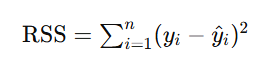

해석: 실제가격-예측가격의 제곱의 합

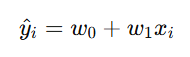

절편과 기울기*독립변수 값으로 예측값 수식을 대입해서 쓰자면 아래와 같다.

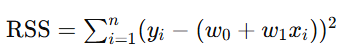

### 주의할 점

1. RSS와 MSE를 혼동하지 않는 것이 중요하다.

     - RSS는 잔차(residual)의 제곱합을 계산한 것이며, 이를 데이터 포인트 수로 나누지 않는다.

          - 모델이 얼마나 잘 맞는지를 나타내는 지표이다.

     - MSE는 RSS를 데이터 포인트 수 𝑛으로 나누어 평균을 구한 값이다.
     
          - 모델의 예측 오차를 측정하는 데 사용된다.

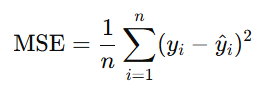

### 비용 함수

- 회귀에서 RSS는 비용이며 w변수(회귀계수)로 구성되는 RSS를 비용 함수라고 한다.

- 비용 함수를 손실 함수(loss function)라고도 한다.

- 그렇다면 어떻게 비용 함수가 최소가 되는 w파라미터를 구할 수 있을까? 방법: 경사하강법

- 원리: 속도와 같은 포물선 형태의 2차 함수의 최저점은 해당 2차 함수의 미분 값인 1차 함수의 기울기가 가장 최소일 때이다.

## 03 실습 코드

In [4]:
# 윤리적인 문제로 1.2 버전 이후로는 삭제되었기에 코드 작성을 우선으로 실습한다.
from sklearn.datasets import load_boston

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 주피터 노트북에서 matplotlib로 생성한 그래프를 노트북 셀 안에 바로 표시하게 한다. 이를 통해 시각적으로 더 명확하고 쉽게 그래프를 확인할 수 있다.
%matplotlib inline

# 데이터셋을 불러와서 데이터프레임화 시킨다.
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# 데이터셋 내에 예측하고자 하는 값을 컬럼으로 추가한다.
bostonDF['PRICE'] = boston.target

In [ ]:
# 2개의 행과 4개의 열을 가진 여러개의 그래프를 그린다.
fig, axs = plt.subplot(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 산점도와 선형 회귀 직선을 함께 표현한다.
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 독립변수, 종속변수 설정
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 클래스 불러오고 적합시키기
lr = LinearRegression()
lr.fit(X_train, y_train)

# text데이터의 예측값
y_preds = lr.predict(X_test)

# 예측 평가 지표
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
# 회귀 계수를 큰 값 순으로 시리즈로 생성한다. 인덱스 컬렴명 설정 필수.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

In [ ]:
# 교차검증 과정을 보다 간편하게 처리할 수 있는 API
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
# estimator
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한다. 루트적용 np.sqrt(mse)하면 RMSE 나온다.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수이다.
print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

## 04 궁금한 점

1. cross_val_score나 GridSearchCV 같은 함수에서 회귀 평가 지표를 적용한다는 것의 의미는?

    - 모델의 성능을 측정하기 위해 회귀 문제에 적합한 평가 지표를 사용한다는 의미이다.
    
    - 회귀 문제의 대표적인 평가 지표에는 평균 제곱 오차(Mean Squared Error, MSE), 평균 절대 오차(Mean Absolute Error, MAE), 결정 계수(R²) 등이 있다.

2. cross_val_score의 개념 및 기능

    - cross_val_score는 교차 검증을 수행하여 모델의 성능을 평가하는 함수이다.
    
    - 회귀 평가 지표를 사용하여 모델의 예측 성능을 측정할 수 있다.

3. GridSearchCV의 개념 및 기능

    - 하이퍼파라미터 튜닝을 위해 그리드 탐색과 교차 검증을 결합한 함수이다.
    
    - 회귀 평가 지표를 사용하여 최적의 하이퍼파라미터를 찾을 수 있다.

4. 위에서 rmse_scores를 구할 때, -1을 곱하는 이유는?

    - cross_val_score 함수는 높은 점수가 좋은 점수 체계를 가지도록 설계되어 있다. 하지만 MSE는 낮을수록 좋은 값이므로, 이를 음수로 변환하여 반환합니다. 그래서 neg_mse_scores는 음수 값을 가진다.

    - 그 다음 RMSE(평균 제곱근 오차)를 계산하려면, MSE 값을 양수로 변환해야 한다. 따라서 neg_mse_scores에 -1을 곱하여 양수로 변환시킨다.
    
    - 양수로 변환된 MSE 값은 제곱근을 취할 수 있게 된다.

5. cross_val_score()의 수행 후 반환 값은 scoring 파라미터로 지정된 '성능 지표' 측정값을 <배열 형태>로 반환한다.

    - 여기서 성능지표란? 성능에 대한 측정이 가능한 지표 값이다.

    - 성능이 좋은지 나쁜지에 대한 성능 측정 기준을 accuracy (정확도) 로 수치화한 것이다.

## 05 관련 프로젝트 코드: 부동산 단위 면적당 주택 가격 예측

### 환경 설정

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [4]:
df=pd.read_csv('../First-sean-project/dataset/Real estate.csv') # 부동산

### 메타 데이터

- X1 transaction date: 거래 날짜

    - 주택 거래가 이루어진 날짜를 의미합니다.
    - 날짜는 주택 시장의 트렌드나 경제 상황을 반영할 수 있습니다.

- X2 house age: 주택의 나이
    - 주택이 지어진 후 경과한 연수를 의미합니다.
    - 일반적으로 주택이 오래될수록 가격이 낮아질 수 있습니다.

- X3 distance to the nearest MRT station: 가장 가까운 지하철역까지의 거리
    - 주택에서 가장 가까운 지하철역까지의 거리를 의미합니다.
    - 대중교통 접근성이 좋을수록 주택 가격이 높아질 수 있습니다.

- X4 number of convenience stores: 편의점의 수
    - 주택 주변의 편의점 수를 의미합니다.
    - 편의시설의 수가 많을수록 생활 편의성이 높아져 주택 가격에 긍정적인 영향을 미칠 수 있습니다.

- X5 latitude: 위도
    - 설명: 주택의 지리적 위치를 나타내는 위도 좌표입니다.
    - 특정 지역의 위도는 주택 가격에 영향을 미칠 수 있습니다.

- X6 longitude: 경도
    - 설명: 주택의 지리적 위치를 나타내는 경도 좌표입니다.
    - 특정 지역의 경도는 주택 가격에 영향을 미칠 수 있습니다.

- Y house price of unit area: 단위 면적당 주택 가격
    - 주택의 단위 면적(평방미터 등)당 가격을 의미합니다.
    - 이는 예측하고자 하는 목표 변수로, 위의 특성들을 이용해 예측됩니다.

In [7]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
df.shape

(414, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### 선형 회귀

In [29]:
X=df.drop('Y house price of unit area', axis=1)
y=df['X4 number of convenience stores']

### ??? 이게 맞지 않나

In [5]:
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

In [6]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 7) 
y= (414,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
X_train.shape

(289, 7)

In [9]:
X_test.shape

(125, 7)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_

array([-2.92429686e-03,  4.68668437e+00, -2.75675355e-01, -4.24850544e-03,
        1.17832502e+00,  2.40947692e+02,  1.86694591e+01])

In [13]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
No,-0.002924
X1 transaction date,4.686684
X2 house age,-0.275675
X3 distance to the nearest MRT station,-0.004249
X4 number of convenience stores,1.178325
X5 latitude,240.947692
X6 longitude,18.669459


In [14]:
y_pred = model.predict(X_test)

In [15]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

### 평가지표

In [16]:
MAE

5.373024532570965

In [17]:
MSE

45.880307428741155

In [18]:
RMSE

6.773500382279546

### 잔차(residual)

In [19]:
# 실제 값(y_test)과 예측 값(y_pred) 간의 차이를 계산하는 코드, 잔차(residual)
test_residual= y_test - y_pred

In [20]:
# Pandas DataFrame을 생성하고, HoloViews를 사용하여 잔차의 커널 밀도 추정(KDE) 플롯을 시각화한다.
# 잔차의 전체적인 분포 패턴을 부드럽게 나타내어 모델의 예측 오차가 어떻게 분포되어 있는지를 시각적으로 평가할 수 있다.
# KDE 플롯은 데이터의 분포를 더 직관적으로 이해할 수 있게 도와준다.

pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

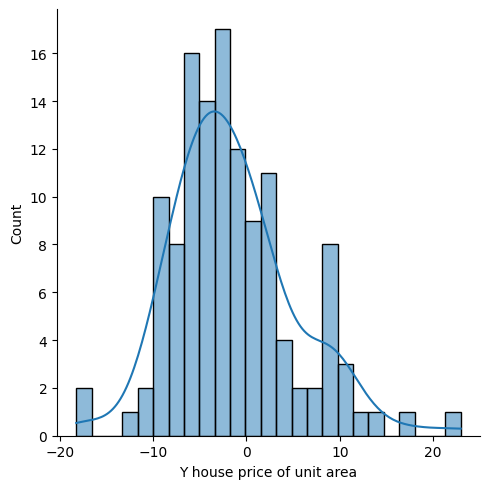

In [21]:
# 잔차의 분포를 히스토그램과 KDE 플롯으로 시각화한다.
# 히스토그램은 잔차의 빈도 분포를 보여주고,
# KDE 곡선은 잔차의 확률 밀도 함수를 부드럽게 나타내어 잔차의 전체적인 분포 패턴을 더 쉽게 이해할 수 있다.
# 이를 통해 모델의 예측 오차가 정규 분포를 따르는지, 특정 패턴이 있는지 등을 시각적으로 평가할 수 있다.

sns.displot(test_residual, bins=25, kde=True)

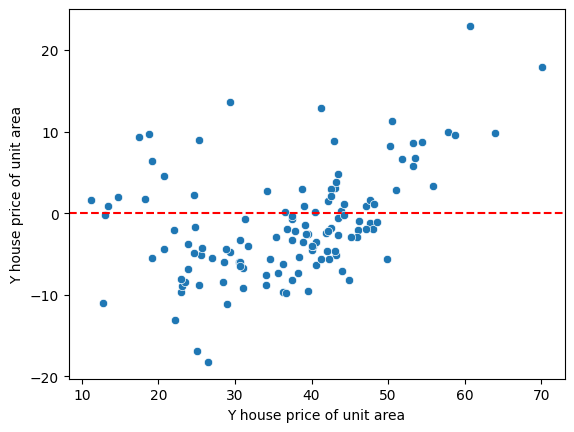

In [105]:
# 실제 값과 잔차를 시각화하여 모델의 예측 성능을 평가한다.
# 산점도를 통해 잔차가 특정 패턴을 보이는지 확인할 수 있다.
# 빨간 점선은 잔차가 0인 기준선을 나타내어 모델의 예측 정확성을 시각적으로 평가할 수 있다.

sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')

## 06 참고 블로그

In [ ]:
https://blue-dot.tistory.com/m/201

In [ ]:
https://www.kaggle.com/code/aminizahra/linear-regression/notebook#Making-Predictions-with-Linear-Regression